In [1]:
import breakwater as bw
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read Input

1. Hydraulic input conditions
2. Damage levels

#### Provide path of input excel file

In [2]:
#Path excel file
path = 'Excel_Files/Input_Energy_Island.xlsx'

In [3]:
df_input_hydraulic = pd.read_excel(path, sheet_name= 'Hydraulic_Design_Conditions')
df_input_damage = pd.read_excel(path, sheet_name= 'Design_Requirements')

In [4]:
df_input_hydraulic.head(3)

,Case_ID,DIR (deg_N),Hm0(m),Tp(s),ReturnPeriod(YR),Design high water level (LAT+m),Design low water level (LAT+m)
0,1,0,3.9,10.4,1,2.41,0
1,2,45,4.2,9.1,1,2.41,0
2,3,90,3.4,7.3,1,2.41,0


In [5]:
df_input_damage.head(3)

,ReturnPeriod(YR),"Damage Rock Armour accepted, S (-)",Damage Toe accepted NoD (-),Overtopping accepted q (l/s/m)
0,1,2,0.5,1
1,5,2,0.5,10
2,10,2,0.5,10


#### Choose a return period

In [6]:
RP = 1000

In [7]:
df_input_hydraulic = df_input_hydraulic[df_input_hydraulic['ReturnPeriod(YR)'] == RP].reset_index()
df_input_damage = df_input_damage[df_input_damage['ReturnPeriod(YR)'] == RP].reset_index()

#### Wave conditions

In [8]:
df_input_hydraulic

,index,Case_ID,DIR (deg_N),Hm0(m),Tp(s),ReturnPeriod(YR),Design high water level (LAT+m),Design low water level (LAT+m)
0,48,49,0,8.4,13.2,1000,3.41,0
1,49,50,45,8.8,11.8,1000,3.41,0
2,50,51,90,6.7,9.1,1000,3.41,0
3,51,52,135,7.5,10.1,1000,3.41,0
4,52,53,180,10.0,13.0,1000,3.41,0
5,53,54,225,11.4,13.8,1000,3.41,0
6,54,55,270,12.8,15.8,1000,3.41,0
7,55,56,315,13.1,17.0,1000,3.41,0


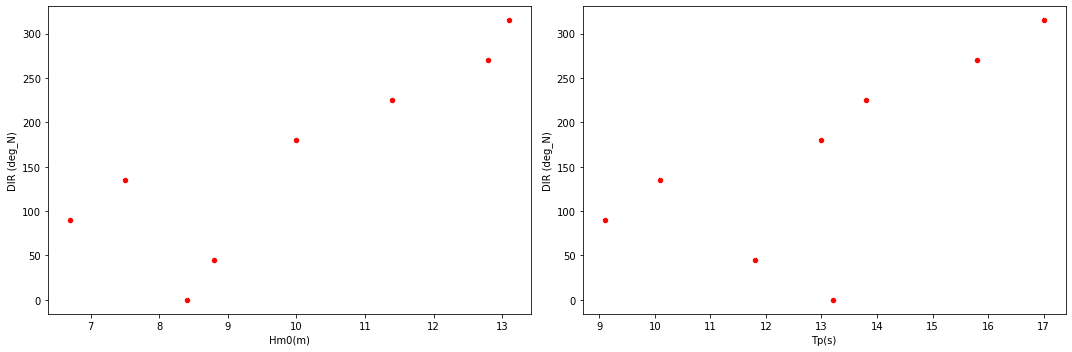

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

df_input_hydraulic.plot('Hm0(m)', 'DIR (deg_N)', color= 'r', kind= 'scatter', ax= ax1);
df_input_hydraulic.plot('Tp(s)', 'DIR (deg_N)', color= 'r', kind= 'scatter', ax= ax2);

fig.tight_layout()

#### Damage levels

In [10]:
df_input_damage

,index,ReturnPeriod(YR),"Damage Rock Armour accepted, S (-)",Damage Toe accepted NoD (-),Overtopping accepted q (l/s/m)
0,6,1000,4,3.0,100


In [11]:
Sd = df_input_damage['Damage Rock Armour accepted, S (-)'].values[0]
NoD = df_input_damage['Damage Toe accepted NoD (-)'].values[0]
q = df_input_damage['Overtopping accepted q (l/s/m)'].values[0]

#### Rock Supply Rates

In [12]:
import requests
import pandas as pd



host = "https://sharepointproxy.data.vanoord.com"
api_key = "OJZFUDkPTy1oIgSwlgPFOkIjf6mrAlcT"
lst = "lists/b0afef99-aad4-4c73-b487-db1e6ea834f1"


url = f"{host}/{lst}/get.json"


res = requests.get(url,headers = {
"X-API-KEY":api_key
})

df_rocksupply = pd.DataFrame(res.json())



df_rocksupply

,id,Cost,Unit,Currency,Quantity,Supplier
0,1,72.0,mt,NOK,1.0,"Skipavika Næringspark,, Sandevegen 631, N-5977..."
1,2,70.5,mt,NOK,1.0,Dalsøyra 5960 Slovag
2,4,75.0,mt,NOK,1.0,"Stema Shipping A/S Sydhavn 4, 1tv DK–6200 Aabenra"
3,5,75.0,mt,NOK,1.0,"Stema Shipping A/S Sydhavn 4, 1tv DK–6200 Aabenra"
4,6,115.5,mt,NOK,1.0,Dalsøyra 5960 Slovag
5,7,60.5,mt,NOK,1.0,Dalsøyra 5960 Slovag
6,8,65.0,mt,NOK,1.0,"Skipavika Næringspark,, Sandevegen 631, N-5977..."
7,9,79.0,mt,NOK,1.0,Drystad 6723 Svelgen
8,10,73.0,mt,NOK,1.0,"Stema Shipping A/S Sydhavn 4, 1tv DK–6200 Aabenra"
9,11,69.5,mt,NOK,1.0,"Skipavika Næringspark,, Sandevegen 631, N-5977..."


#### Equipment

In [13]:
host = "https://sharepointproxy.data.vanoord.com"
api_key = "OJZFUDkPTy1oIgSwlgPFOkIjf6mrAlcT"
lst = "lists/acf46572-0d47-4b9c-aa86-9f63122d6d31"


url = f"{host}/{lst}/get.json"


res = requests.get(url,headers = {
"X-API-KEY":api_key
})

df_equip = pd.DataFrame(res.json())



df_equip

,id,Type,Reach,Title,Weight,Specification,Capacity [ton]
0,1,Excavator,short,EXC_<CAT330+equiv(<30T)_short,<30T,CAT325,3.45
1,2,Excavator,long,EXC_<CAT330+equiv(<30T)_long,<30T,CAT325,2.84
2,3,Excavator,short,EXC_CAT330+equiv(30-39T)_short,30-39T,CAT330; CAT336,4.50
3,4,Excavator,long,EXC_CAT330+equiv(30-39T)_long,30-39T,CAT330; CAT336,3.25
4,5,Excavator,short,EXC_CAT345+equiv(40-59T)_short,40-59T,CAT345,5.78
5,6,Excavator,medium,EXC_CAT345+equiv(40-59T)_medium,40-59T,CAT345,5.24
6,7,Excavator,long,EXC_CAT345+equiv(40-59T)_long,40-59T,CAT345,4.79
7,8,Excavator,short,EXC_CAT374+equiv(60-79T)_short,60-79T,CAT374,8.45
8,9,Excavator,medium,EXC_CAT374+equiv(60-79T)_medium,60-79T,CAT374,7.93
9,10,Excavator,long,EXC_CAT374+equiv(60-79T)_long,60-79T,CAT374,7.57


## 3D shape

In [14]:
path = 'KML_files/Energy_Island_Shape.kml'

In [15]:
wave_conditions = {}

for index, row in df_input_hydraulic.iterrows():
    wave_conditions[row['DIR (deg_N)']] = {'Hm0': row['Hm0(m)'], 'Tp': row['Tp(s)']}
    
wave_conditions

{0.0: {'Hm0': 8.4, 'Tp': 13.2},
 45.0: {'Hm0': 8.8, 'Tp': 11.8},
 90.0: {'Hm0': 6.7, 'Tp': 9.1},
 135.0: {'Hm0': 7.5, 'Tp': 10.1},
 180.0: {'Hm0': 10.0, 'Tp': 13.0},
 225.0: {'Hm0': 11.4, 'Tp': 13.8},
 270.0: {'Hm0': 12.8, 'Tp': 15.8},
 315.0: {'Hm0': 13.1, 'Tp': 17.0}}

In [16]:
# create a rock grading, give correct values for M50, NLL and NUL

def Non_standard_grading(NLL, NUL, rho_s = 2650, A = {'min': 0.663, 'max': 1.515}, 
                         B = {'min': 1.041, 'max': 0.959}, fine = False):
    """
    
    Calculate the M50_emll and the M50_umul for non-standard gradings
    
    Parameters
    -------------
    NLL: int
        Nominal Lower Limit of the grading
    NULL int
        Nominal Upper Limit of the grading
    A: dict
        Coefficient upper and lower
    B: float
        Coefficient upper and lower
        
    returns
    -----------
    tuple
    
    """
    
    if not fine:
        M50 = (NLL + NUL) / 2
        M50_emll = A['min'] * M50 ** B['min']
        M50_umul = A['max'] * M50 ** B['max']
        return (M50_emll, M50_umul)
    
    else:
        NLL = 2650 * (NLL/1000)**3
        NUL = 2650 * (NUL/1000)**3
        M50 = (NLL + NUL) / 2
        M50_emll = A['min'] * M50 ** B['min']
        M50_umul = A['max'] * M50 ** B['max']
        return (NLL, NUL, M50_emll, M50_umul)

# fine gradings
NLL_0_200mm, NUL_0_200mm, M50_emll_0_200mm, M50_umul_0_200mm = Non_standard_grading(NLL = 1, NUL = 200, fine= True)
NLL_0_300mm, NUL_0_300mm, M50_emll_0_300mm, M50_umul_0_300mm = Non_standard_grading(NLL = 1, NUL = 300, fine= True)

# coarse gradings
M50_emll_8_12t, M50_umul_8_12t = Non_standard_grading(NLL = 8000, NUL = 12000)
M50_emll_10_13t, M50_umul_10_13t = Non_standard_grading(NLL = 10000, NUL = 13000)

Grading_EI = {
               '0-200mm':
                   {'M50': [M50_emll_0_200mm, M50_umul_0_200mm], 'NLL': NLL_0_200mm, 'NUL': NLL_0_300mm},
               '0-300mm':
                   {'M50': [M50_emll_0_300mm, M50_umul_0_300mm], 'NLL': NLL_0_300mm, 'NUL': NUL_0_300mm},
               '60-300kg':
                   {'M50': [45, 135], 'NLL': 15, 'NUL': 300},
               '300-1000kg':
                   {'M50': [540, 690], 'NLL': 300, 'NUL': 1000},
               '1-3t':
                   {'M50': [1700, 2100], 'NLL': 1000, 'NUL': 3000},
               '3-6t':
                   {'M50': [4200, 4800], 'NLL': 3000, 'NUL': 6000},
               '8-12t':
                   {'M50': [M50_emll_8_12t, M50_umul_8_12t], 'NLL': 8000, 'NUL': 12000},
               '10-13t':
                   {'M50': [M50_emll_10_13t, M50_umul_10_13t], 'NLL': 10000, 'NUL': 13000}
              }

Grading = bw.RockGrading(grading= Grading_EI)

In [17]:
# create cubipod armour units

def Cubipod_units(masses, rho_c = 2400, n = 1):
    
    """
    Function to create Cubipods from list of masses
    
    Parameters
    -------------
    masses: lst
        list of the masses in tons
    rho_c: int
        density of the concrete in kg/m3
    n: int
        number of layers
    
    returns
    -----------
    dict
    
    """
    
    units = {}
    for m in masses:
        V = m / rho_c * 1000
        Dn = V ** (1/3)
        h = n * Dn
        rho_placement = 100 / (Dn**2 / 0.59)
        Vc = (V * rho_placement) / 100
        V, Dn, h, Vc = round(V, 2), round(Dn, 2), round(h, 2), round(Vc, 2)
        units[V] = {"D": Dn, "h": h, "Vc": Vc, 'M': f'{m}t'}
        
    return units
        
        
        
units = Cubipod_units(masses = [28, 35, 41, 50, 55, 65, 95, 150, 230])


Cubipod = bw.ConcreteArmour(
                            kd=12,
                            name="Cubipods",
                            units=units,
                            )

In [18]:
battjes_3D = bw.BattjesGroenendijk_3D(h = 27, wave_conditions= wave_conditions, slope_foreshore= (1, 100))

H2_3D = battjes_3D.get_Hp(0.02)

ULS_3D = bw.LimitState_3D(h= 27, wave_conditions= wave_conditions, H2_per = H2_3D, Sd= 4, Nod= 5, q= 100, label= 'uls')

ULS_3D.transform_periods(0.5)

In [19]:
ULS_3D.Limit_states

{0.0: <breakwater.conditions.LimitState at 0x22721459220>,
 45.0: <breakwater.conditions.LimitState at 0x227214598e0>,
 90.0: <breakwater.conditions.LimitState at 0x227214598b0>,
 135.0: <breakwater.conditions.LimitState at 0x22721456d90>,
 180.0: <breakwater.conditions.LimitState at 0x22721456e80>,
 225.0: <breakwater.conditions.LimitState at 0x22721456f40>,
 270.0: <breakwater.conditions.LimitState at 0x22721456190>,
 315.0: <breakwater.conditions.LimitState at 0x22721456730>}

In [20]:
EI_3D = bw.structure_3D(
                        kml_path= path,
                        wave_direction= 'right',
                        wave_conditions= wave_conditions,
                        shape= 'Linestring',
                        structure_type= 'revetment',
                        slope= (2,3),
                        slope_foreshore= (1,100),
                        rho_w= 1025,
                        B= 5,
                        N= 2600,
                        LimitState= ULS_3D,
                        ArmourUnit= Cubipod,
                        Grading= Grading,
                        core_material = {'class': 'QR 1-1000kg', 'Dn50': 0.45},
                        filter_rule = 'XblocPlus'
                        )

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy 


In [21]:
EI_3D.df_design

,Rc,class Dn50,coordinates,length [m],structure
sections,,,,,
section A,8.839832,3.002960,"[(6.534416612128041, 56.4987311184507), (6.535...",267.0,id.None: breakwater with armour units as armou...
section B,13.222359,3.968503,"[(6.53548988285297, 56.5010516054596), (6.5354...",90.0,id.None: breakwater with armour units as armou...
section C,13.276766,3.968503,"[(6.53502139799405, 56.5014886577658), (6.5284...",419.0,id.None: breakwater with armour units as armou...
section D,16.486732,3.968503,"[(6.52841280707902, 56.5024227366748), (6.5283...",90.0,id.None: breakwater with armour units as armou...
section E,15.283291,3.968503,"[(6.52762258069738, 56.5021635946119), (6.5267...",207.0,id.None: breakwater with armour units as armou...
section F,16.023581,3.968503,"[(6.52679096600187, 56.5003651710275), (6.5267...",72.0,id.None: breakwater with armour units as armou...
section G,13.383866,3.407940,"[(6.5271902369669, 56.4998350953359), (6.53034...",236.0,id.None: breakwater with armour units as armou...
section H,13.383866,3.407940,"[(6.530347911255419, 56.4986314981359), (6.535...",355.0,id.None: breakwater with armour units as armou...


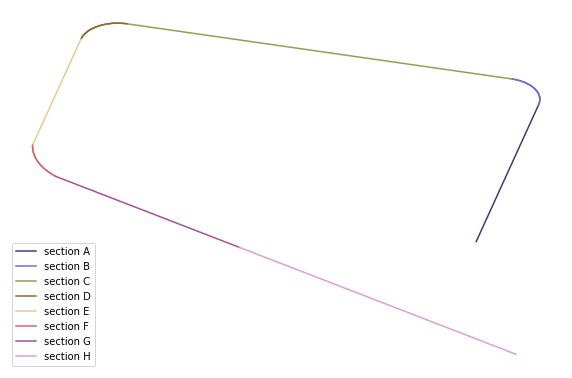

In [22]:
EI_3D.plot_topview()

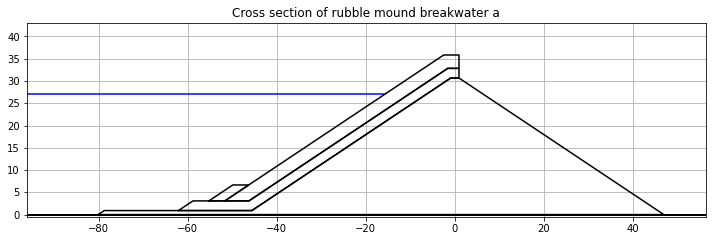

In [23]:
EI_3D.plot_section('a', section= 'section A')

In [24]:
EI_3D.print_section('a', section= 'section A')

  Variant a
| Layer      |   computed Dn50 | class   |   class Dn50 | state      |   layers | Mass   |
|------------|-----------------|---------|--------------|------------|----------|--------|
| armour     |           2.844 | 27.08   |        3.003 | uls_180.0  |        1 | 65t    |
| underlayer |           1.070 | 3-6t    |        1.193 | see armour |        2 |        |
| toe        |           1.110 | 3-6t    |        1.193 | uls_180.0  |          |        |

Rc = 8.84 m, designed with uls_180.0 limit state




In [25]:
# Water levels LAT

MHW = 27 + 0.51 
MSL = 27 + 0.32
MLW = 27 + 0.17

In [26]:
dumptruck = bw.Truck(name = 'dumptruck',
                     design_type = {'0-300mm': {'cost': 16, 'CO2': None, 'production_rate':  15713.88},
                                    'QR 1-1000kg': {'cost': 16, 'CO2': None, 'production_rate':  16197.39}},
                     waterlvl = MHW,
                     h_dry = 2,
                     required_length= 5
                    )

Hit1200 = bw.HITACHI_EX1200(name = 'Hit1200',
                            design_type = {'3-6t': {'cost': 56, 'CO2': None, 'production_rate':  6963.16}},
                            waterlvl = MHW,
                            h_dry = 2,
                            required_length= 4
)

Hit1900 = bw.HITACHI_EX1900(name = 'Hit1900',
                            design_type = {'1-3t': {'cost': 56, 'CO2': None, 'production_rate':  6963.16},
                                           '3-6t': {'cost': 56, 'CO2': None, 'production_rate':  6963.16},
                                           '8-12t': {'cost': 57, 'CO2': None, 'production_rate':  8355.80},
                                           '10-13t': {'cost': 57, 'CO2': None, 'production_rate':  7687.33},
                                           '28t': {'cost': 57, 'CO2': None, 'production_rate': 14043.08}},
                            waterlvl = MHW,
                            h_dry = 2,
                            required_length= 5
)

equipment = [dumptruck, Hit1200, Hit1900]

In [27]:
rock_procurement = {
                     '0-200mm': {'cost': 9, 'CO2': 9.55*10**-6}, 
                     '0-300mm': {'cost': 9, 'CO2': 9.55*10**-6}, 
                     '60-300kg': {'cost': 12, 'CO2': 9.25*10**-6}, 
                     '300-1000kg': {'cost': 12, 'CO2': 3.6*10**-5}, 
                     '1-3t': {'cost': 12, 'CO2': 3.6*10**-5}, 
                     '3-6t': {'cost': 14, 'CO2': 3.6*10**-5}, 
                     '8-12t': {'cost': 20, 'CO2': 3.6*10**-5}, 
                     '10-13t': {'cost': 25, 'CO2': 3.6*10**-5}
                    }


Cubipod_procurement = {
                        11.67: {'cost': 105.51, 'CO2': 1.46*10**-4},
                        14.58: {'cost': 105.51, 'CO2': 1.46*10**-4},
                        17.08: {'cost': 105.51, 'CO2': 1.46*10**-4},
                        20.83: {'cost': 105.51, 'CO2': 1.46*10**-4},
                        22.92: {'cost': 105.51, 'CO2': 1.46*10**-4},
                        27.08: {'cost': 105.51, 'CO2': 1.46*10**-4},
                        39.58: {'cost': 105.51, 'CO2': 1.46*10**-4},
                        62.5: {'cost': 105.51 + 20.83, 'CO2': 1.46*10**-4},
                        95.83: {'cost': 105.51 + 20.83, 'CO2': 1.46*10**-4},
                        }

In [28]:
df_material_cost = EI_3D.totalcost_3D(
                                       core_price= {'cost': 11, 'CO2': 9*10**-6}, 
                                       grading_price= rock_procurement, 
                                       unit_price= Cubipod_procurement
                                      )

In [29]:
df_material_cost.head(50)

,Rc,class Dn50,coordinates,length [m],structure,material cost [EUR],material CO2 [kge]
sections,,,,,,,
section A,8.839832,3.002960,"[(6.534416612128041, 56.4987311184507), (6.535...",267.0,id.None: breakwater with armour units as armou...,"{'a': 10038221.55, 'b': 10065745.49, 'c': 1023...","{'a': 12.1381, 'b': 13.256, 'c': 13.3694, 'd':..."
section B,13.222359,3.968503,"[(6.53548988285297, 56.5010516054596), (6.5354...",90.0,id.None: breakwater with armour units as armou...,"{'a': 5105131.35, 'b': 5184333.94, 'c': 520142...","{'a': 6.0156, 'b': 6.1843, 'c': 6.0226}"
section C,13.276766,3.968503,"[(6.53502139799405, 56.5014886577658), (6.5284...",419.0,id.None: breakwater with armour units as armou...,"{'a': 23815630.9, 'b': 24185004.38, 'c': 24264...","{'a': 28.0573, 'b': 28.8438, 'c': 28.0897}"
section D,16.486732,3.968503,"[(6.52841280707902, 56.5024227366748), (6.5283...",90.0,id.None: breakwater with armour units as armou...,"{'a': 5744569.63, 'b': 5832038.47, 'c': 584859...","{'a': 6.6889, 'b': 6.8735, 'c': 6.6971}"
section E,15.283291,3.968503,"[(6.52762258069738, 56.5021635946119), (6.5267...",207.0,id.None: breakwater with armour units as armou...,"{'a': 12656180.56, 'b': 12847762.51, 'c': 1288...","{'a': 14.7897, 'b': 15.1929, 'c': 14.8075}"
section F,16.023581,3.968503,"[(6.52679096600187, 56.5003651710275), (6.5267...",72.0,id.None: breakwater with armour units as armou...,"{'a': 4519563.61, 'b': 4587700.49, 'c': 460190...","{'a': 5.2675, 'b': 5.4107, 'c': 5.274}"
section G,13.383866,3.407940,"[(6.5271902369669, 56.4998350953359), (6.53034...",236.0,id.None: breakwater with armour units as armou...,"{'a': 11306157.17, 'b': 11333083.82, 'c': 1176...","{'a': 13.5659, 'b': 14.6777, 'c': 14.8121, 'd'..."
section H,13.383866,3.407940,"[(6.530347911255419, 56.4986314981359), (6.535...",355.0,id.None: breakwater with armour units as armou...,"{'a': 17007143.2, 'b': 17047647.27, 'c': 17690...","{'a': 20.4063, 'b': 22.0787, 'c': 22.2809, 'd'..."


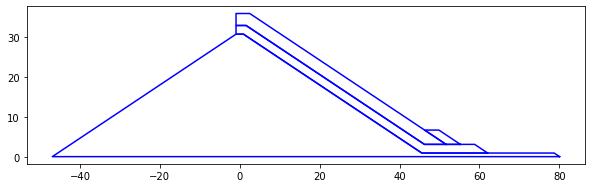

In [30]:
EI_3D.plot_3D()

In [31]:
# df_total_cost = EI_3D.totalcost_3D(
#                                    equipment= equipment,
#                                    core_price= {'cost': 11, 'CO2': 9*10**-6}, 
#                                    grading_price= rock_procurement, 
#                                    unit_price= Cubipod_procurement
#                                   )

In [32]:
# df_total_cost

In [33]:
config = bw.Configurations_3D(
                    kml_path = path,
                    wave_conditions = wave_conditions,
                    structure= 'CRMR',
                    LimitState= ULS_3D,
                    rho_w= 1025,
                    N = 2100,
                    slope_foreshore= (2,3),
                    Grading= Grading,
                    slope= ((1,3), (2, 3), 2),
                    B= (1, 30, 5),
                    core_material = {'class': 'QR 1-1000kg', 'Dn50': 0.57},
                    ArmourUnit= Cubipod,
                    filter_rule="XblocPlus",
                    )

Computing Rubble Mound [===========] 10/10


In [34]:
config.df

,B,B_toe,Dn50_core,concept,id,slope,slope_toe,type,warnings
0,1.00,None,0.57,<breakwater.structure_3D.structure_3D object a...,1,"[1, 3.0]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
1,8.25,None,0.57,<breakwater.structure_3D.structure_3D object a...,2,"[1, 3.0]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
2,15.50,None,0.57,<breakwater.structure_3D.structure_3D object a...,3,"[1, 3.0]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
3,22.75,None,0.57,<breakwater.structure_3D.structure_3D object a...,4,"[1, 3.0]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
4,30.00,None,0.57,<breakwater.structure_3D.structure_3D object a...,5,"[1, 3.0]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
5,1.00,None,0.57,<breakwater.structure_3D.structure_3D object a...,6,"[1, 1.5]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
6,8.25,None,0.57,<breakwater.structure_3D.structure_3D object a...,7,"[1, 1.5]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
7,15.50,None,0.57,<breakwater.structure_3D.structure_3D object a...,8,"[1, 1.5]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
8,22.75,None,0.57,<breakwater.structure_3D.structure_3D object a...,9,"[1, 1.5]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
9,30.00,None,0.57,<breakwater.structure_3D.structure_3D object a...,10,"[1, 1.5]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...


In [35]:
config.add_cost(
                core_price= {'cost': 11, 'CO2': 9*10**-6}, 
                grading_price= rock_procurement, 
                unit_price= Cubipod_procurement
)

                  Rc  class Dn50  \
sections                           
section A   8.691943    2.268247   
section B  13.222359    3.002960   
section C  13.276766    3.002960   
section D  16.486732    3.002960   
section E  15.283291    3.002960   
section F  16.023581    3.002960   
section G  13.089699    2.575309   
section H  13.089699    2.575309   
section I   8.457476    2.268247   

                                                 coordinates  length [m]  \
sections                                                                   
section A  [(6.534416612128041, 56.4987311184507), (6.535...       267.0   
section B  [(6.53548988285297, 56.5010516054596), (6.5354...        90.0   
section C  [(6.53502139799405, 56.5014886577658), (6.5284...       419.0   
section D  [(6.52841280707902, 56.5024227366748), (6.5283...        90.0   
section E  [(6.52762258069738, 56.5021635946119), (6.5267...       207.0   
section F  [(6.52679096600187, 56.5003651710275), (6.5267...        72.

                  Rc  class Dn50  \
sections                           
section A   6.806469    2.268247   
section B  11.875307    3.002960   
section C  11.924170    3.002960   
section D  14.807116    3.002960   
section E  13.614135    3.002960   
section F  14.273574    3.002960   
section G  11.635817    3.002960   
section H  11.635817    3.002960   
section I   5.983869    2.268247   

                                                 coordinates  length [m]  \
sections                                                                   
section A  [(6.534416612128041, 56.4987311184507), (6.535...       267.0   
section B  [(6.53548988285297, 56.5010516054596), (6.5354...        90.0   
section C  [(6.53502139799405, 56.5014886577658), (6.5284...       419.0   
section D  [(6.52841280707902, 56.5024227366748), (6.5283...        90.0   
section E  [(6.52762258069738, 56.5021635946119), (6.5267...       207.0   
section F  [(6.52679096600187, 56.5003651710275), (6.5267...        72.

                  Rc  class Dn50  \
sections                           
section A   8.839832    3.002960   
section B  13.222359    3.968503   
section C  13.276766    3.968503   
section D  16.486732    3.968503   
section E  15.283291    3.968503   
section F  16.023581    3.968503   
section G  13.383866    3.407940   
section H  13.383866    3.407940   
section I   8.956228    2.575309   

                                                 coordinates  length [m]  \
sections                                                                   
section A  [(6.534416612128041, 56.4987311184507), (6.535...       267.0   
section B  [(6.53548988285297, 56.5010516054596), (6.5354...        90.0   
section C  [(6.53502139799405, 56.5014886577658), (6.5284...       419.0   
section D  [(6.52841280707902, 56.5024227366748), (6.5283...        90.0   
section E  [(6.52762258069738, 56.5021635946119), (6.5267...       207.0   
section F  [(6.52679096600187, 56.5003651710275), (6.5267...        72.


                  Rc  class Dn50  \
sections                           
section A   3.225351    3.002960   
section B   8.229728    3.968503   
section C   8.263591    3.968503   
section D  10.261507    3.968503   
section E   9.249811    3.968503   
section F   9.697851    3.968503   
section G   7.905688    3.968503   
section H   7.905688    3.968503   
section I   1.521531    2.575309   

                                                 coordinates  length [m]  \
sections                                                                   
section A  [(6.534416612128041, 56.4987311184507), (6.535...       267.0   
section B  [(6.53548988285297, 56.5010516054596), (6.5354...        90.0   
section C  [(6.53502139799405, 56.5014886577658), (6.5284...       419.0   
section D  [(6.52841280707902, 56.5024227366748), (6.5283...        90.0   
section E  [(6.52762258069738, 56.5021635946119), (6.5267...       207.0   
section F  [(6.52679096600187, 56.5003651710275), (6.5267...        72

In [36]:
config.df

,B,B_toe,Dn50_core,concept,id,slope,slope_toe,type,warnings
0,1.00,None,0.57,<breakwater.structure_3D.structure_3D object a...,1,"[1, 3.0]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
1,8.25,None,0.57,<breakwater.structure_3D.structure_3D object a...,2,"[1, 3.0]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
2,15.50,None,0.57,<breakwater.structure_3D.structure_3D object a...,3,"[1, 3.0]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
3,22.75,None,0.57,<breakwater.structure_3D.structure_3D object a...,4,"[1, 3.0]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
4,30.00,None,0.57,<breakwater.structure_3D.structure_3D object a...,5,"[1, 3.0]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
5,1.00,None,0.57,<breakwater.structure_3D.structure_3D object a...,6,"[1, 1.5]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
6,8.25,None,0.57,<breakwater.structure_3D.structure_3D object a...,7,"[1, 1.5]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
7,15.50,None,0.57,<breakwater.structure_3D.structure_3D object a...,8,"[1, 1.5]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
8,22.75,None,0.57,<breakwater.structure_3D.structure_3D object a...,9,"[1, 1.5]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
9,30.00,None,0.57,<breakwater.structure_3D.structure_3D object a...,10,"[1, 1.5]","(2, 3)",CRMR,[{message : LimitStateWarning('used Hm0 instea...
